In [1]:
#Imports
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import sp


from env import get_connection

- Is there a cohort that referred to a lesson significantly more than other cohorts seemed to gloss over?

- At some point in 2019, the ability for students and alumni to access both curriculums (web dev to ds, ds to web dev)

- Which lessons are least accessed?

query = '''
        select * 
        from cohorts
        right join logs on logs.cohort_id = cohorts.id;
        '''

url = get_connection('curriculum_logs')

df= pd.read_sql(query, url)


#*changed cell to markdown to prevent from running*

In [2]:
#changed to read csv after caching 
#df.to_csv('curriculum_logs_all.csv', index= False)

df = pd.read_csv('curriculum_logs_all.csv')

In [3]:
#borrowed from prior assignment
def summarize(df):
    shape = df.shape
    info = df.info()
    describe = df.describe()
    distributions = df.hist(figsize=(24, 10), bins=20)
    #pairplot = sns.pairplot(df)
    return shape, info, describe, distributions, #pairplot

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900223 entries, 0 to 900222
Data columns (total 15 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   id          847330 non-null  float64
 1   name        847330 non-null  object 
 2   slack       847330 non-null  object 
 3   start_date  847330 non-null  object 
 4   end_date    847330 non-null  object 
 5   created_at  847330 non-null  object 
 6   updated_at  847330 non-null  object 
 7   deleted_at  0 non-null       float64
 8   program_id  847330 non-null  float64
 9   date        900223 non-null  object 
 10  time        900223 non-null  object 
 11  path        900222 non-null  object 
 12  user_id     900223 non-null  int64  
 13  cohort_id   847330 non-null  float64
 14  ip          900223 non-null  object 
dtypes: float64(4), int64(1), object(10)
memory usage: 103.0+ MB


((900223, 15),
 None,
                   id  deleted_at     program_id        user_id      cohort_id
 count  847330.000000         0.0  847330.000000  900223.000000  847330.000000
 mean       48.501049         NaN       2.086004     458.825707      48.501049
 std        32.795482         NaN       0.388231     249.296767      32.795482
 min         1.000000         NaN       1.000000       1.000000       1.000000
 25%        28.000000         NaN       2.000000     269.000000      28.000000
 50%        33.000000         NaN       2.000000     475.000000      33.000000
 75%        57.000000         NaN       2.000000     660.000000      57.000000
 max       139.000000         NaN       4.000000     981.000000     139.000000,
 array([[<AxesSubplot:title={'center':'id'}>,
         <AxesSubplot:title={'center':'deleted_at'}>],
        [<AxesSubplot:title={'center':'program_id'}>,
         <AxesSubplot:title={'center':'user_id'}>],
        [<AxesSubplot:title={'center':'cohort_id'}>, <AxesS

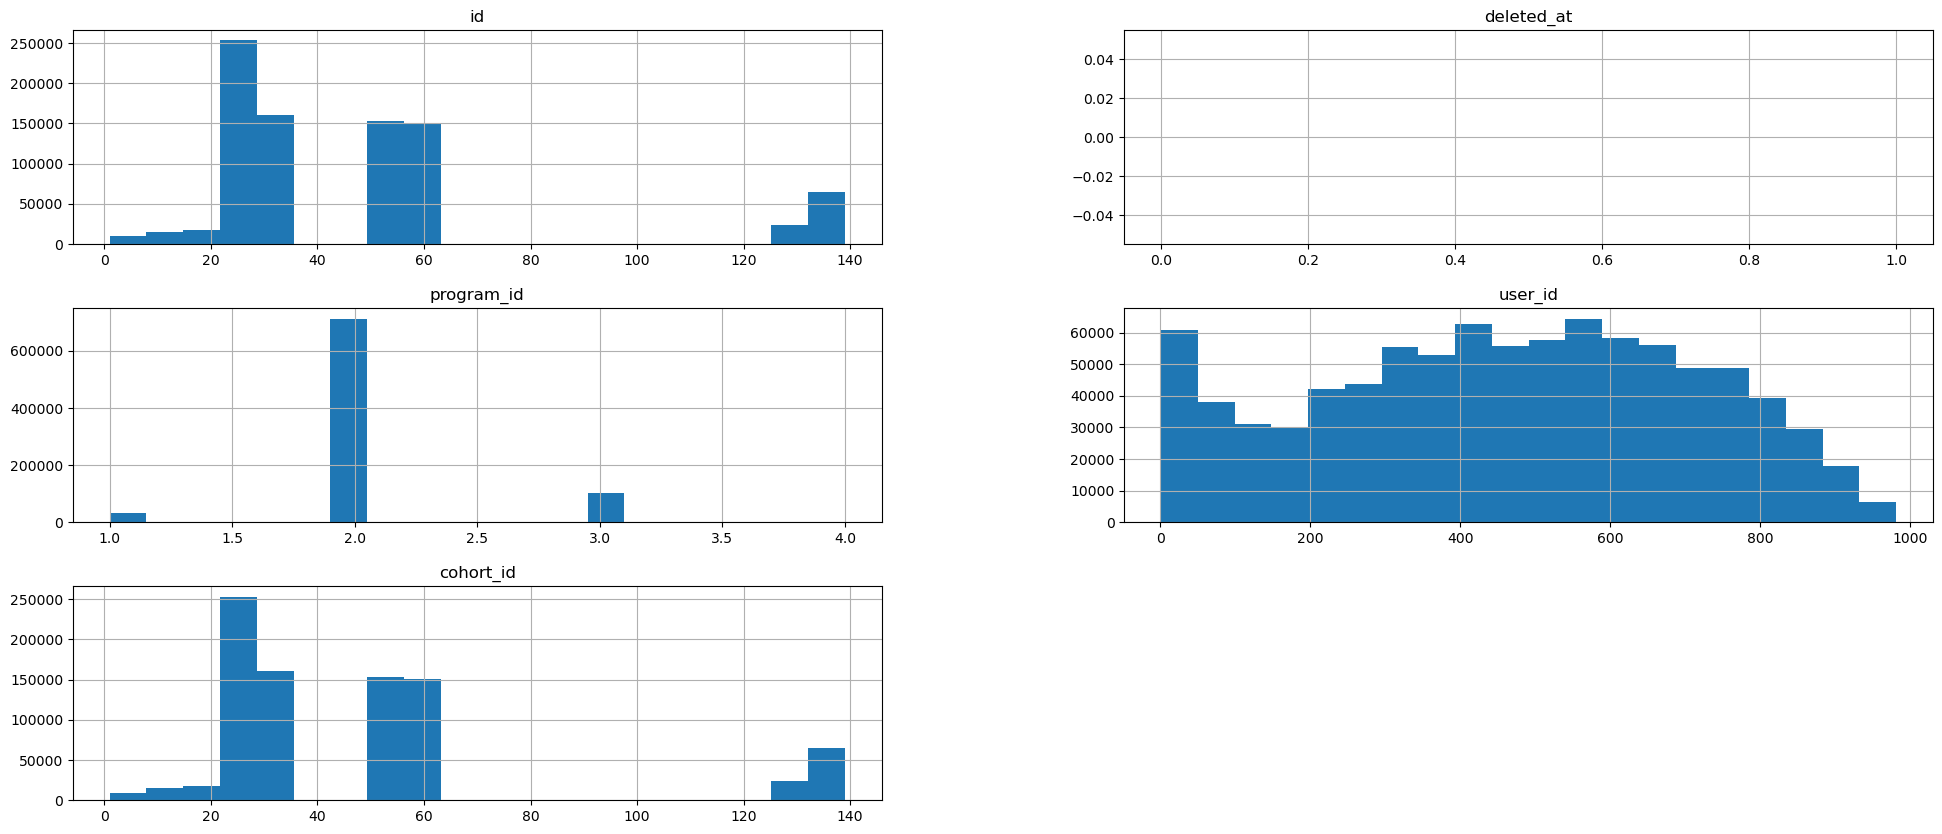

In [4]:
summarize(df)

In [5]:
#deleted_at has all nulls.  dropping

df = df.drop(columns= ['deleted_at'])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900223 entries, 0 to 900222
Data columns (total 14 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   id          847330 non-null  float64
 1   name        847330 non-null  object 
 2   slack       847330 non-null  object 
 3   start_date  847330 non-null  object 
 4   end_date    847330 non-null  object 
 5   created_at  847330 non-null  object 
 6   updated_at  847330 non-null  object 
 7   program_id  847330 non-null  float64
 8   date        900223 non-null  object 
 9   time        900223 non-null  object 
 10  path        900222 non-null  object 
 11  user_id     900223 non-null  int64  
 12  cohort_id   847330 non-null  float64
 13  ip          900223 non-null  object 
dtypes: float64(3), int64(1), object(10)
memory usage: 96.2+ MB


In [7]:
#Change date to datetime object
df['date'] = pd.to_datetime(df['date'], infer_datetime_format=True)
#Set as index
df = df.set_index('date')
df.head()

,id,name,slack,start_date,end_date,created_at,updated_at,program_id,time,path,user_id,cohort_id,ip
date,,,,,,,,,,,,,
2018-01-26,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0,09:55:03,/,1,8.0,97.105.19.61
2018-01-26,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0,09:56:02,java-ii,1,8.0,97.105.19.61
2018-01-26,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0,09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61
2018-01-26,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0,09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61
2018-01-26,22.0,Teddy,#teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,2.0,09:56:24,javascript-i/conditionals,2,22.0,97.105.19.61


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 900223 entries, 2018-01-26 to 2021-04-21
Data columns (total 13 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   id          847330 non-null  float64
 1   name        847330 non-null  object 
 2   slack       847330 non-null  object 
 3   start_date  847330 non-null  object 
 4   end_date    847330 non-null  object 
 5   created_at  847330 non-null  object 
 6   updated_at  847330 non-null  object 
 7   program_id  847330 non-null  float64
 8   time        900223 non-null  object 
 9   path        900222 non-null  object 
 10  user_id     900223 non-null  int64  
 11  cohort_id   847330 non-null  float64
 12  ip          900223 non-null  object 
dtypes: float64(3), int64(1), object(9)
memory usage: 96.2+ MB


((900223, 13),
 None,
                   id     program_id        user_id      cohort_id
 count  847330.000000  847330.000000  900223.000000  847330.000000
 mean       48.501049       2.086004     458.825707      48.501049
 std        32.795482       0.388231     249.296767      32.795482
 min         1.000000       1.000000       1.000000       1.000000
 25%        28.000000       2.000000     269.000000      28.000000
 50%        33.000000       2.000000     475.000000      33.000000
 75%        57.000000       2.000000     660.000000      57.000000
 max       139.000000       4.000000     981.000000     139.000000,
 array([[<AxesSubplot:title={'center':'id'}>,
         <AxesSubplot:title={'center':'program_id'}>],
        [<AxesSubplot:title={'center':'user_id'}>,
         <AxesSubplot:title={'center':'cohort_id'}>]], dtype=object))

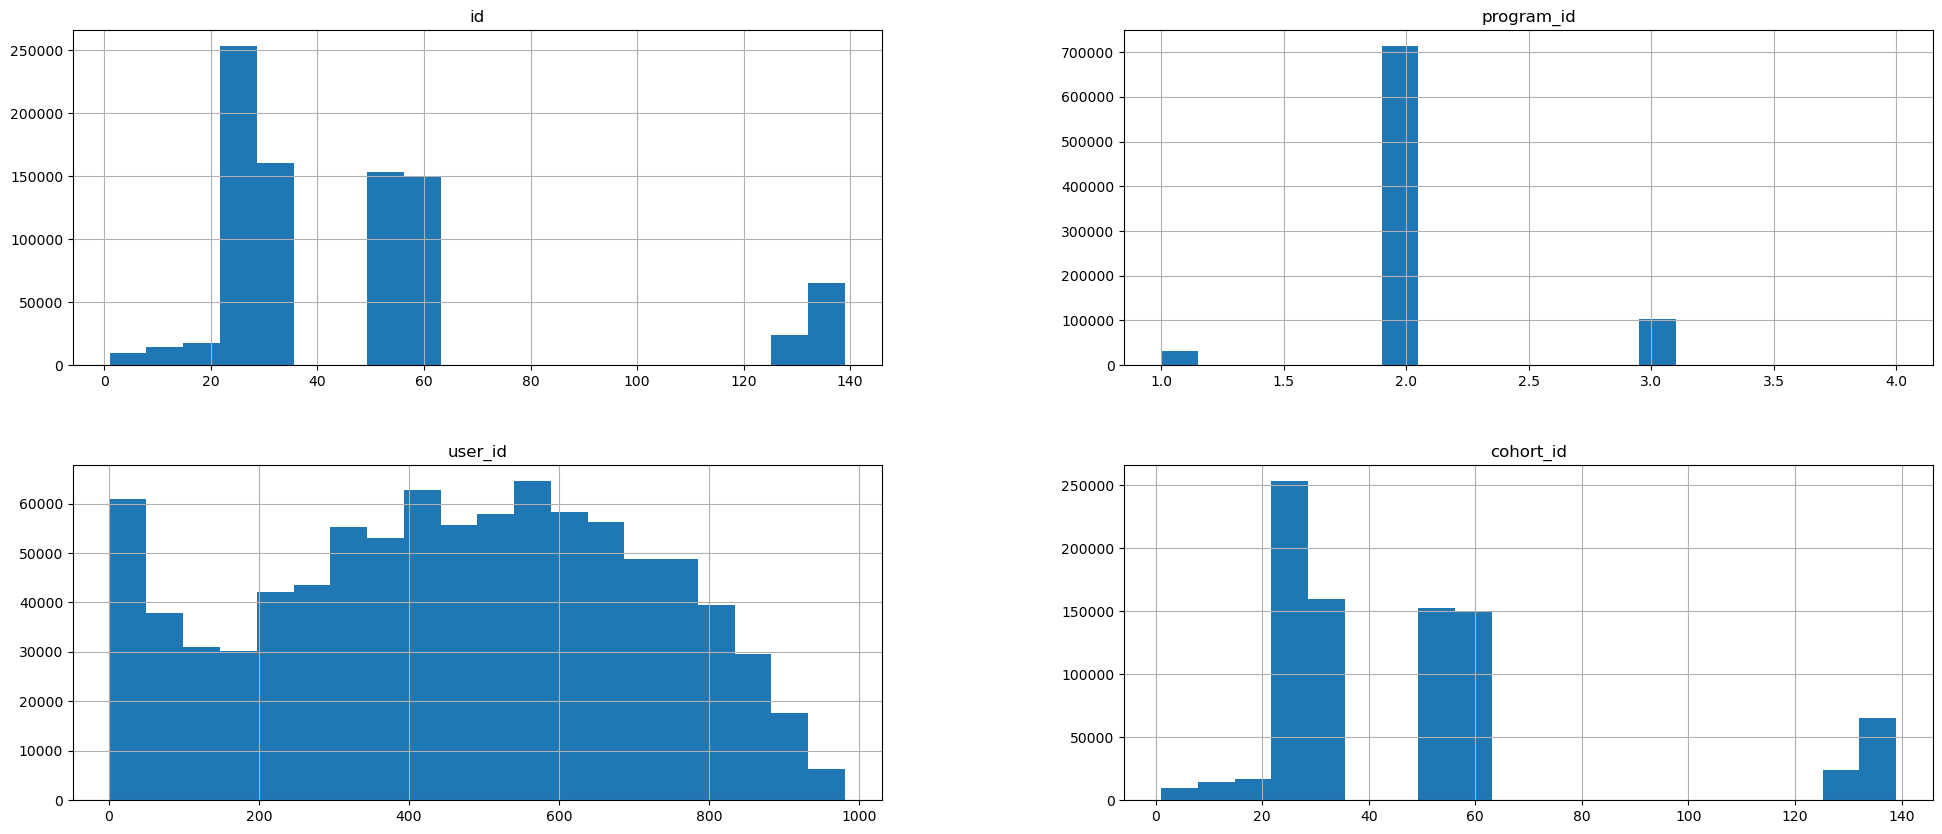

In [8]:
summarize(df)

#### Question 2: Is there a cohort that referred to a lesson significantly more than other cohorts seemed to gloss over?


(don't mind me just thinking out loud)
what do I want to explore to answer this question?
which feature specifies lesson?
- path 
- see how many unique paths there are
How can I use bollinger bands to explore the number of hits per lesson
- use compute bollinger function fro sp.py
- plot hits over time for each lesson and look for anomalies


(new strat, calc ema and boll, plot, select rows for windows 
with anamolous hits, see which lessons are being hit during
that window)




In [9]:
#check how many unique paths (lessons) there are
df.path.nunique()


2313

2313 unique lessons is too many to plot.  

How else can I visualize the number of hits per lesson?
- count for each path resampled by day


In [10]:
daily_hits = df['path'].resample('D').count()


In [11]:
daily_hits.sort_values(ascending= False).head(20)

date
2021-03-19    3104
2021-04-12    2446
2021-03-25    2369
2020-09-08    2304
2021-03-16    2298
2020-07-27    2275
2021-02-02    2257
2021-04-05    2236
2021-03-29    2230
2020-07-16    2196
2021-04-15    2192
2021-04-06    2184
2021-03-23    2171
2021-04-19    2156
2020-04-20    2144
2020-09-28    2133
2020-08-03    2117
2021-01-11    2046
2020-10-26    2039
2020-07-28    2031
Name: path, dtype: int64

In [12]:
daily_hits.sort_values(ascending= False).head()

date
2021-03-19    3104
2021-04-12    2446
2021-03-25    2369
2020-09-08    2304
2021-03-16    2298
Name: path, dtype: int64

In [13]:
weekly_avg = daily_hits.ewm(span=7).mean()
weekly_avg.head()

date
2018-01-26    572.000000
2018-01-27    376.571429
2018-01-28    287.243243
2018-01-29    485.737143
2018-01-30    540.235595
Freq: D, Name: path, dtype: float64

In [14]:
monthly_avg = daily_hits.ewm(span=30).mean()
monthly_avg.head()

date
2018-01-26    572.000000
2018-01-27    395.300000
2018-01-28    315.139578
2018-01-29    457.002386
2018-01-30    501.369064
Freq: D, Name: path, dtype: float64

In [15]:
quarterly_avg = daily_hits.ewm(span=90).mean()
quarterly_avg.head()

date
2018-01-26    572.000000
2018-01-27    399.100000
2018-01-28    321.030081
2018-01-29    452.545042
2018-01-30    494.228442
Freq: D, Name: path, dtype: float64

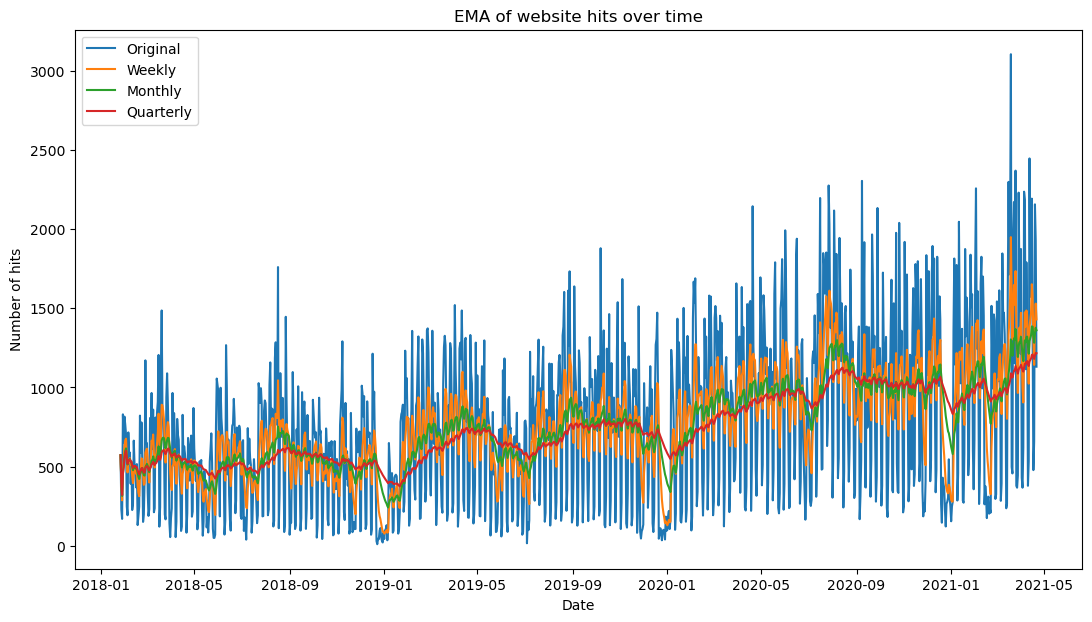

In [16]:
plt.figure(figsize=(13, 7))
plt.plot(daily_hits, label='Original')
plt.plot(weekly_avg, label='Weekly')
plt.plot(monthly_avg, label='Monthly')
plt.plot(quarterly_avg, label='Quarterly')
plt.xlabel('Date')
plt.ylabel('Number of hits')
plt.title('EMA of website hits over time')
plt.legend()
plt.show()

get boll for weekly, monthly, quarterly and plot seperately

In [17]:
#quarterly bolls
weekly_boll = sp.compute_bollinger(weekly_avg, 'hits', span= 90, k=1.5)
monthly_boll = sp.compute_bollinger(monthly_avg, 'hits', span= 90, k=1.5)
quartlery_boll = sp.compute_bollinger(quarterly_avg, 'hits', span= 90, k=1.5)

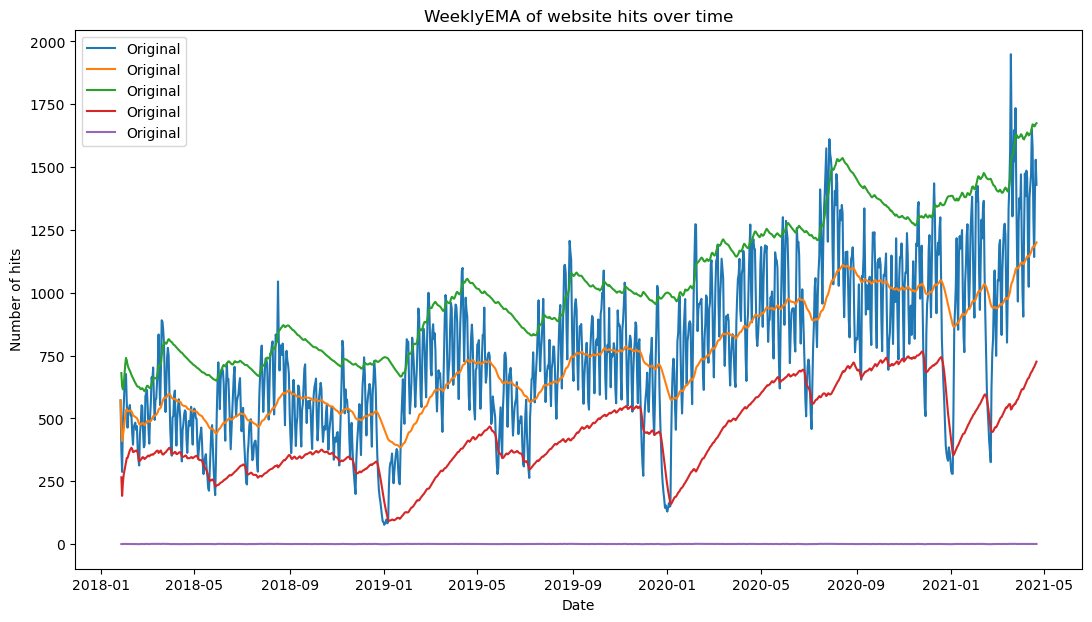

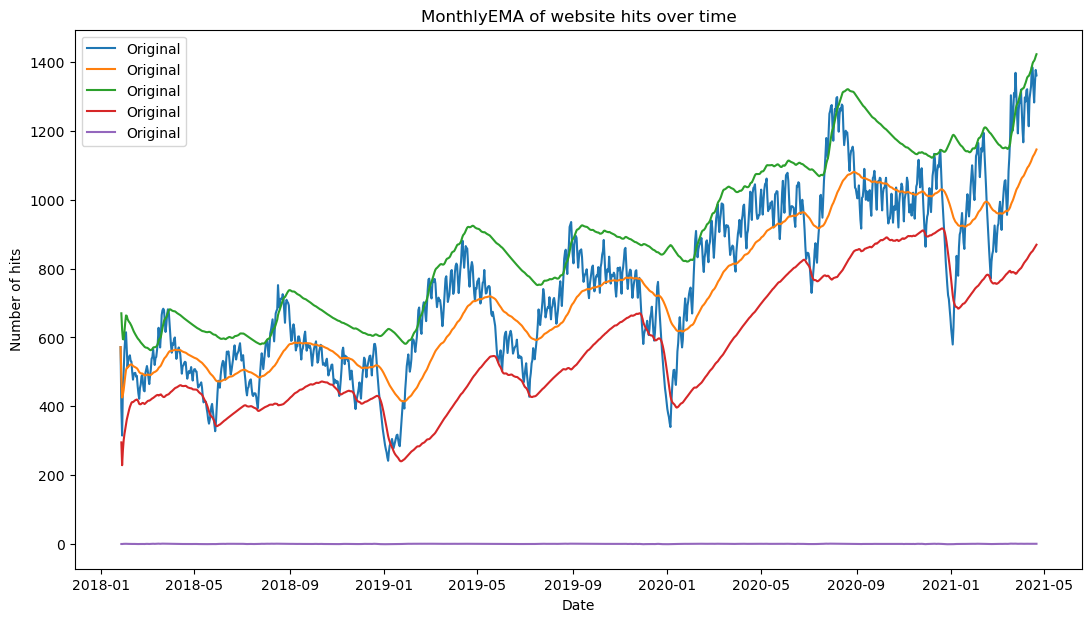

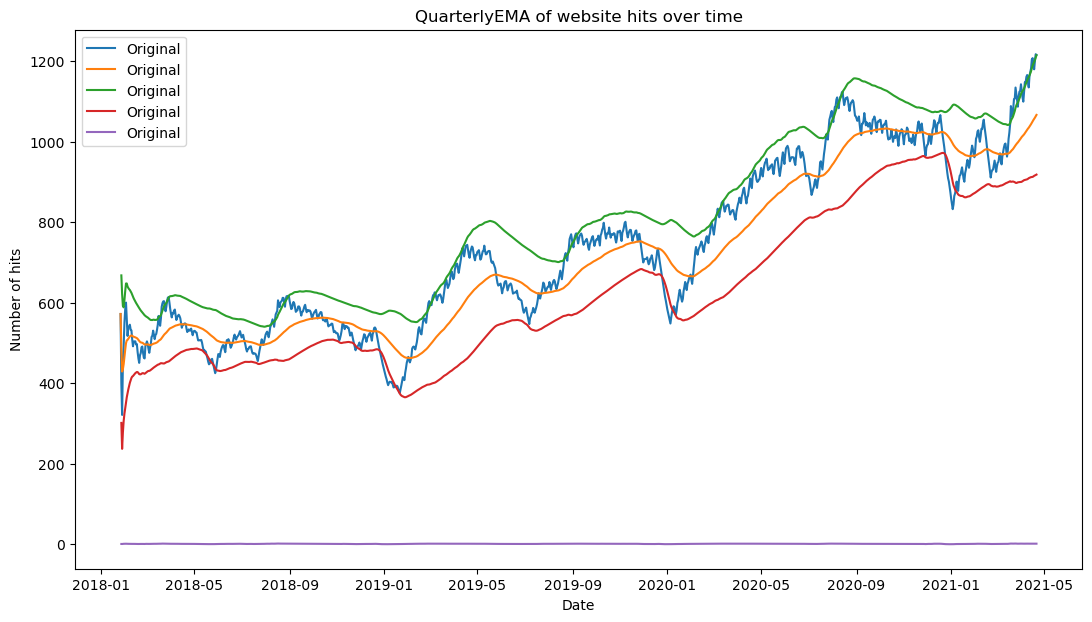

In [18]:
sp.plot_ema(weekly_boll, 'Weekly')
plt.show()
sp.plot_ema(monthly_boll, 'Monthly')
plt.show()
sp.plot_ema(quartlery_boll, 'Quarterly')
plt.show()

In [19]:
#select rows where upper is > 1
#plot which paths are hit during those windows
#modify compute_bollinger function to return upper and lower bands



#### Question 5: At some point in 2019, the ability for students and alumni to access both curriculums (web dev to ds, ds to web dev)



#### Question 7: Which lessons are least accessed?